## In this notebook I'm going to create a model that 'predicts' bitcoin's price.

#### This project is based on ZTM tensorflow course https://www.udemy.com/course/tensorflow-developer-certificate-machine-learning-zero-to-mastery/

In [120]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [121]:
!nvidia-smi

Fri Aug 19 09:29:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    27W /  70W |   1392MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [122]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-08-19 09:29:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2022-08-19 09:29:31 (10.5 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



In [123]:
df = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 
                 parse_dates=['Date'],
                 index_col=['Date'])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [124]:
df.iloc[0]

Currency                     BTC
Closing Price (USD)    123.65499
24h Open (USD)         124.30466
24h High (USD)         124.75166
24h Low (USD)          122.56349
Name: 2013-10-01 00:00:00, dtype: object

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [126]:
df.isnull().values.any()

False

In [127]:
len(df)

2787

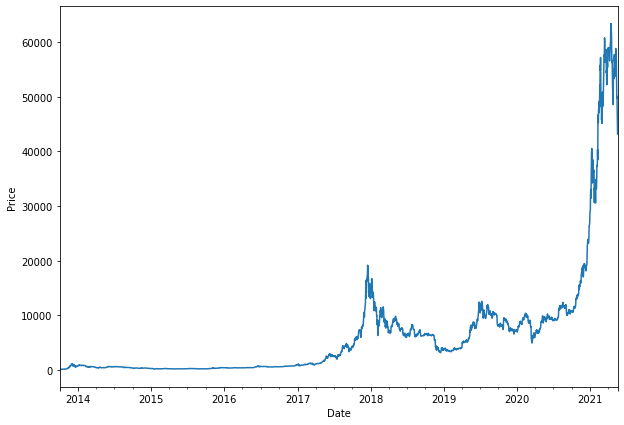

In [128]:
df['Closing Price (USD)'].plot(figsize=(10, 7));
plt.ylabel('Price');
plt.xlabel('Date');

In [129]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [130]:
!wget https://raw.githubusercontent.com/Illalla/helper_functions_for_tf/main/helper_functions.py

--2022-08-19 09:29:32--  https://raw.githubusercontent.com/Illalla/helper_functions_for_tf/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8637 (8.4K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]   8.43K  --.-KB/s    in 0s      

2022-08-19 09:29:32 (68.3 MB/s) - ‘helper_functions.py.1’ saved [8637/8637]



In [131]:
from helper_functions import *

In [132]:
import csv
import datetime

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv') as csvfile:
  reader = csv.DictReader(csvfile)
  dates_list = []
  prices_list = []
  for i in reader:
    date_list = i['Date'].split('-')
    dates_list.append(datetime.datetime(int(date_list[0]), int(date_list[1]), int(date_list[2])))
    prices_list.append(float(i['Closing Price (USD)']))

In [133]:
dates_list[:10], prices_list[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

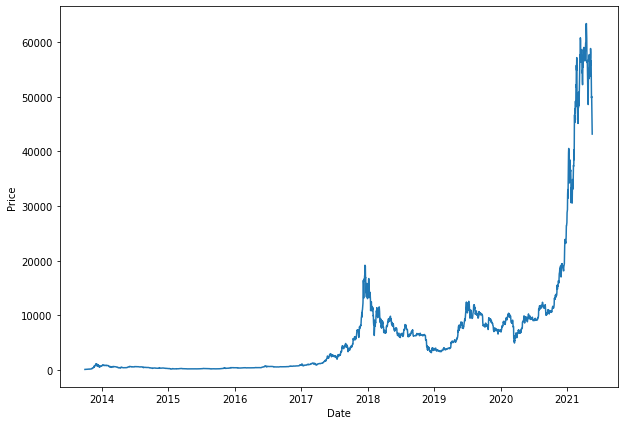

In [134]:
plt.figure(figsize=(10, 7));
plt.plot(dates_list, prices_list);
plt.xlabel('Date');
plt.ylabel('Price');

### Formatting data

In [135]:
dates = df.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

In [136]:
dates[:10], dates.shape, prices.shape

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'), (2787,), (2787,))

In [137]:
windows = np.array([(prices[i:i+7]) for i in range(0, len(dates)-7)])
windows[:10], len(windows)

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966],
        [120.65533, 121.795  , 123.033  , 124.049  , 125.96116, 125.27966,
         125.9275 ],
        [121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333],
        [123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199],
        [124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333],
        [125.96116, 125.27966, 125.9275 , 126.38333, 135.24199, 133.20333,
         142.76333]]), 2780)

In [138]:
targets = np.array([prices[i+7] for i in range(0, len(prices)-7)])

In [139]:
targets[0], len(targets)

(123.033, 2780)

In [140]:
SPLIT_FACTOR = 0.8 #@param {type: 'slider', min:0, max:1, step:0.05}

In [141]:
dates_train, dates_test = dates[:int(SPLIT_FACTOR*len(dates))], dates[int(SPLIT_FACTOR*len(dates)):]
prices_train, prices_test = prices[:int(SPLIT_FACTOR*len(dates))], prices[int(SPLIT_FACTOR*len(dates)):]

In [142]:
len(dates_train), len(dates_test), len(prices_train), len(prices_test), len(dates)

(2229, 558, 2229, 558, 2787)

In [143]:
X_train, X_test = windows[0: int(len(windows)*SPLIT_FACTOR)].astype('float32'), windows[int(len(windows)*SPLIT_FACTOR):].astype('float32')
y_train, y_test = targets[0: int(len(windows)*SPLIT_FACTOR)].astype('float32'), targets[int(len(windows)*SPLIT_FACTOR):].astype('float32')

In [144]:
X_train.dtype, X_train.shape, X_test.shape, y_train.shape, y_test.shape

(dtype('float32'), (2224, 7), (556, 7), (2224,), (556,))

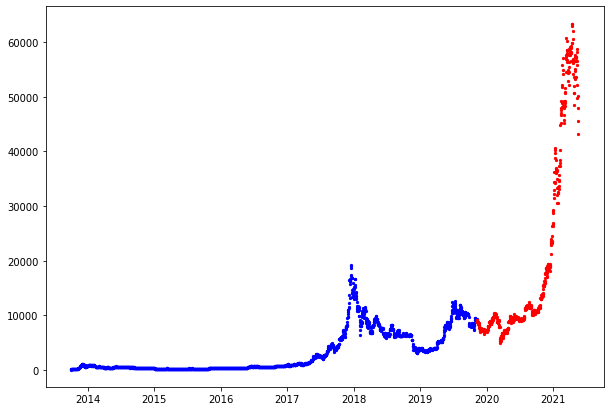

In [145]:
plt.figure(figsize=(10, 7))
plt.scatter(dates[0:int(len(dates)*SPLIT_FACTOR)], prices[0:int(len(dates)*SPLIT_FACTOR)], s=5, label='Train Data', c='b')
plt.scatter(dates[int(len(dates)*SPLIT_FACTOR):], prices[int(len(dates)*SPLIT_FACTOR):], s=5, label='Test Data', c='r')
plt.show();

In [146]:
def plotting_function(timesteps, values, start=0, end=None, format='.', label=None):
  plt.plot(timesteps[start: end], values[start: end], format, label=label)
  plt.xlabel('Time')
  plt.ylabel('Values')
  if label:
    plt.legend(fontsize=10)
  plt.grid(True)

### "Model" 0 - Naive forecast

Formula:
$$\hat{y}_{t} =  y_{t-1}$$

In [147]:
y_preds = prices_test[:-1]

In [148]:
prices_test[:10], prices_test[-10:], prices_test[1:].shape

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
        52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
        45604.61575361, 43144.47129086]),
 (557,))

In [149]:
y_preds[:10], y_preds[-10:], y_preds.shape

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]),
 (557,))

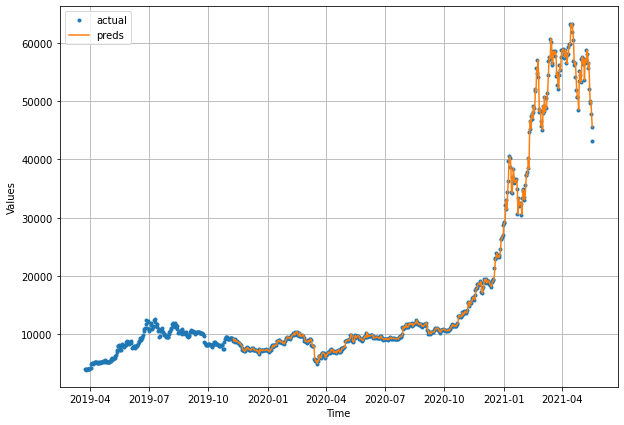

In [150]:
plt.figure(figsize=(10, 7))
plotting_function(dates, start=2000, values=prices, label='actual')
plotting_function(dates_test[1:], y_preds, label='preds', format='-')

In [151]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Calculates MASE (assuming no seasonality)
  """
  naive_mae = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  return mae/naive_mae

In [152]:
mean_absolute_scaled_error(prices_test[1:], y_preds)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9995699939182624>

In [153]:
def forecasting_scores(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.keras.metrics.RootMeanSquaredError()(y_true, y_pred)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    mape = tf.reduce_mean(mape)
  return {'mae': mae.numpy(),
          'mse': mse.numpy(),
          'rmse': rmse.numpy(),
          'mape': mape.numpy(),
          'mase': mase.numpy()}

In [154]:
model_0_scores = forecasting_scores(prices_test[1:], y_preds)
model_0_scores

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

###KATS - https://github.com/facebookresearch/Kats

In [155]:
# !pip install --upgrade pip
# !MINIMAL_KATS=1 pip install kats

In [156]:
# df_kats = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 
#                  parse_dates=['Date'])
# df_kats = df_kats[['Date', 'Closing Price (USD)']].rename(columns={'Closing Price (USD)': 'value', 'Date': 'time'})
# df_kats.head()

In [157]:
# from kats.models.prophet import ProphetModel, ProphetParams
# from kats.consts import TimeSeriesData
# params = ProphetParams(seasonality_mode='multiplicative', daily_seasonality=True)
# df_k = TimeSeriesData(df_kats.iloc[:int(len(df_kats)*SPLIT_FACTOR)])
# m = ProphetModel(df_k, params)
# m.fit()
# m.predict(steps=1, freq='D')

### Windows and horizons function

In [158]:
HORIZON_SIZE = 1
WINDOW_SIZE = 7

def windows_and_horizons(values, horizon_size=HORIZON_SIZE, window_size=WINDOW_SIZE):
  """
  Returns windows and horizons of given shapes
  values: values that are to be ordered
  """
  windows = np.array([(values[i: i + window_size]) for i in range(len(values)-window_size-horizon_size+1)])
  horizons = np.array([values[i + window_size: i + window_size + horizon_size] for i in range(len(values)-window_size-horizon_size+1)])
  return windows, horizons

In [159]:
windows, targets = windows_and_horizons(prices, horizon_size=1)

In [160]:
windows.shape, targets.shape

((2780, 7), (2780, 1))

In [161]:
print(f'Window 1: {windows[0]}, target 1: {targets[0]}')

Window 1: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ], target 1: [123.033]


In [162]:
def make_train_test_split(windows, labels, train_split=0.8):
  """
  Returns: train_data, test_data, train_labels, test_labels
  """
  length = len(windows)
  return windows[:int(length*train_split)].astype(np.float32), windows[int(length*train_split):].astype(np.float32), labels[:int(length*train_split)].astype(np.float32), labels[int(length*train_split):].astype(np.float32)

In [163]:
train_data, test_data, train_targets, test_targets = make_train_test_split(windows, targets, SPLIT_FACTOR)

In [164]:
import os

def create_cp_callback(name, save_path='experiments/checkpoints', save_best_only=True, save_weights_only=False, monitor='val_loss'):
  """
  Creates a model checkpoint callback.
  Args:
    name - name of the model
    save_path - place where the checkpoint will be stored
    save_best_only - if True it saves only the best results, if False it saves the last result
    save_weights_only - if True it saves only weights, if False it saves the whole model
    monitor - what value it will take into account
  """

  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, name), save_best_only=save_best_only, save_weights_only=save_weights_only, monitor=monitor, verbose=0)

### Model 1: Dense (window = 7, horizon = 1)

In [165]:
inputs = layers.Input(shape=(7, ), dtype=tf.float32)
x = layers.Dense(128, activation='relu')(inputs)
outputs = layers.Dense(1)(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer='Adam', metrics=['mae'])
model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense_8 (Dense)             (None, 128)               1024      
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [166]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_targets)).batch(64).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_targets)).batch(64).prefetch(tf.data.AUTOTUNE)
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [167]:
history_1 = model_1.fit(train_dataset, epochs=50, validation_data=test_dataset, steps_per_epoch=len(train_dataset), validation_steps=len(test_dataset), callbacks=[create_cp_callback('model_1', save_best_only=True)])

Epoch 1/50
35/35 [==============================] - 1s 16ms/step - loss: 266.7504 - mae: 266.7504 - val_loss: 1049.8156 - val_mae: 1049.8156
Epoch 2/50
35/35 [==============================] - 0s 14ms/step - loss: 202.9497 - mae: 202.9497 - val_loss: 999.4427 - val_mae: 999.4427
Epoch 3/50
35/35 [==============================] - 0s 13ms/step - loss: 194.6845 - mae: 194.6845 - val_loss: 966.8691 - val_mae: 966.8691
Epoch 4/50
35/35 [==============================] - 0s 13ms/step - loss: 191.5937 - mae: 191.5937 - val_loss: 935.7169 - val_mae: 935.7169
Epoch 5/50
35/35 [==============================] - 0s 14ms/step - loss: 186.4365 - mae: 186.4365 - val_loss: 907.0582 - val_mae: 907.0582
Epoch 6/50
35/35 [==============================] - 0s 13ms/step - loss: 181.8555 - mae: 181.8555 - val_loss: 885.6034 - val_mae: 885.6034
Epoch 7/50
35/35 [==============================] - 0s 13ms/step - loss: 177.0897 - mae: 177.0897 - val_loss: 858.5424 - val_mae: 858.5424
Epoch 8/50
35/35 [=======

In [168]:
# Load in saved best performin model_1
model_1 = tf.keras.models.load_model('experiments/checkpoints/model_1/')

In [169]:
model_1_preds = model_1.predict(test_dataset)

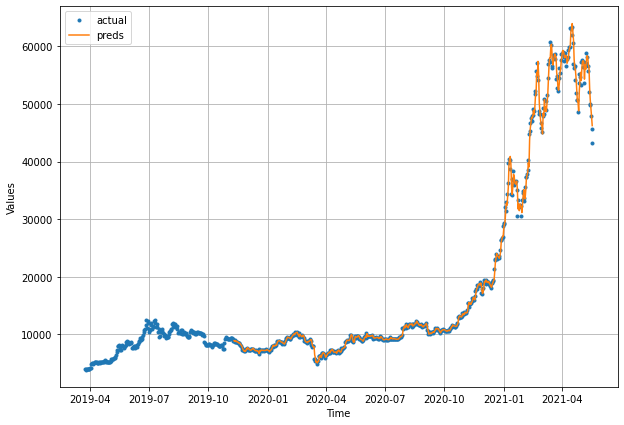

In [170]:
plt.figure(figsize=(10, 7))
plotting_function(dates, start=2000, values=prices, label='actual')
plotting_function(dates_test[2:], model_1_preds, label='preds', format='-')

In [171]:
model_1_scores = forecasting_scores(tf.squeeze(model_1_preds), tf.squeeze(test_targets))

In [172]:
model_1_scores

{'mae': 583.0194,
 'mse': 1202658.5,
 'rmse': 1096.6578,
 'mape': 2.6214695,
 'mase': 1.2234869}

### Model 2: Dense (window=30, horizon=1)

In [173]:
windows, horizons = windows_and_horizons(prices, window_size=30)
train_data, test_data, train_targets, test_targets = make_train_test_split(windows, horizons)
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_targets)).batch(64).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_targets)).batch(64).prefetch(tf.data.AUTOTUNE)

In [174]:
inputs = layers.Input(shape=(30,), dtype=tf.float32)
x = layers.Dense(128, activation='relu')(inputs)
outputs = layers.Dense(1)(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss='mae', optimizer='adam', metrics=['mae'])
history_2 = model_2.fit(train_dataset, epochs=50, validation_data=test_dataset, steps_per_epoch=len(train_dataset), validation_steps=len(test_dataset), callbacks=[create_cp_callback('model_2')])

Epoch 1/50
35/35 [==============================] - 1s 24ms/step - loss: 658.8582 - mae: 658.8582 - val_loss: 1881.6078 - val_mae: 1881.6078
Epoch 2/50
35/35 [==============================] - 0s 13ms/step - loss: 359.9972 - mae: 359.9972 - val_loss: 1536.7111 - val_mae: 1536.7111
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 552.2807 - mae: 552.2807 - val_loss: 1715.1339 - val_mae: 1715.1339
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 628.9393 - mae: 628.9393 - val_loss: 2038.7742 - val_mae: 2038.7742
Epoch 5/50
35/35 [==============================] - 0s 13ms/step - loss: 292.0940 - mae: 292.0940 - val_loss: 1240.9526 - val_mae: 1240.9526
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 331.0599 - mae: 331.0599 - val_loss: 1411.3707 - val_mae: 1411.3707
Epoch 7/50
35/35 [==============================] - 0s 3ms/step - loss: 253.5882 - mae: 253.5882 - val_loss: 1303.7798 - val_mae: 1303.7798
Epoch 8/50
35/35 

In [175]:
model_2 = tf.keras.models.load_model('/content/experiments/checkpoints/model_2')

In [176]:
model_2_preds = model_2.predict(test_dataset)
model_2_scores = forecasting_scores(tf.squeeze(model_2_preds), tf.squeeze(test_targets))
model_2_scores

{'mae': 837.0294,
 'mse': 2447879.2,
 'rmse': 1564.57,
 'mape': 3.6312923,
 'mase': 2.184465}

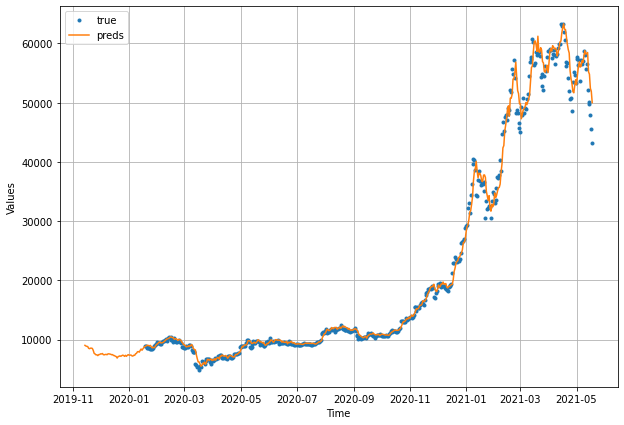

In [177]:
plt.figure(figsize=(10, 7))
plotting_function(dates, prices, 2300, label='true')
plotting_function(dates_test[6:], model_2_preds, format='-', label='preds')

### Model 3: Dense (window=30, horizon=7)

In [178]:
windows, horizons = windows_and_horizons(prices, window_size=30, horizon_size=7)
train_data, test_data, train_targets, test_targets = make_train_test_split(windows, horizons)
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_targets)).batch(64).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_targets)).batch(64).prefetch(tf.data.AUTOTUNE)

In [179]:
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(7)
])

model_3.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [180]:
history_3 = model_3.fit(train_dataset, epochs=50, validation_data=test_dataset, steps_per_epoch=len(train_dataset), validation_steps=len(test_dataset), callbacks=[create_cp_callback('model_3')])

Epoch 1/50
35/35 [==============================] - 1s 15ms/step - loss: 709.9568 - mae: 709.9568 - val_loss: 3375.9702 - val_mae: 3375.9702
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 649.5464 - mae: 649.5464 - val_loss: 3428.3130 - val_mae: 3428.3130
Epoch 3/50
35/35 [==============================] - 0s 13ms/step - loss: 562.2693 - mae: 562.2693 - val_loss: 2966.6531 - val_mae: 2966.6531
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 547.1028 - mae: 547.1028 - val_loss: 2995.6990 - val_mae: 2995.6990
Epoch 5/50
35/35 [==============================] - 0s 13ms/step - loss: 494.6423 - mae: 494.6423 - val_loss: 2603.3000 - val_mae: 2603.3000
Epoch 6/50
35/35 [==============================] - 0s 14ms/step - loss: 477.6627 - mae: 477.6627 - val_loss: 2572.2214 - val_mae: 2572.2214
Epoch 7/50
35/35 [==============================] - 0s 13ms/step - loss: 446.5873 - mae: 446.5873 - val_loss: 2363.8965 - val_mae: 2363.8965
Epoch 8/50
35/3

In [181]:
model_3 = tf.keras.models.load_model('/content/experiments/checkpoints/model_3')

In [182]:
model_3_preds = model_3.predict(test_dataset)
model_3_preds.shape, test_targets.shape

((551, 7), (551, 7))

In [183]:
model_3_scores = forecasting_scores(model_3_preds, test_targets)
model_3_scores

{'mae': 1367.3154,
 'mse': 6154863.5,
 'rmse': 2480.8997,
 'mape': 6.2464967,
 'mase': 3.3909345}

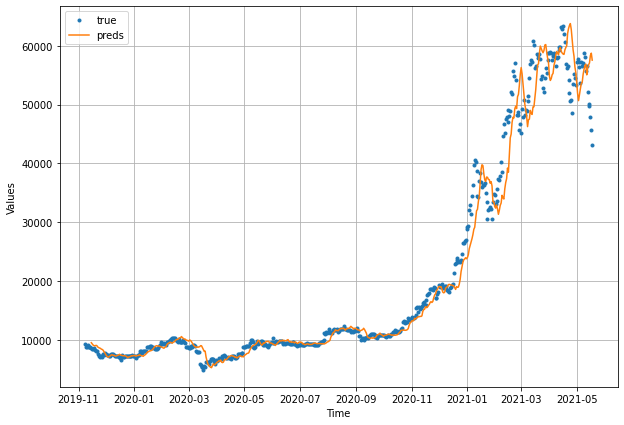

In [184]:
plt.figure(figsize=(10, 7))
plotting_function(dates_test, prices_test, label='true')
plotting_function(dates_test[-len(test_data):], tf.reduce_mean(model_3_preds, axis=1), format='-', label='preds')

In [185]:
def plot_scores(scores_list):
  """
  scores_list - a list of dicts of different models' scores
  """
  dataframe = pd.DataFrame(scores_list, index=[str(x) for x in scores_list])
  dataframe.plot(kind='bar')

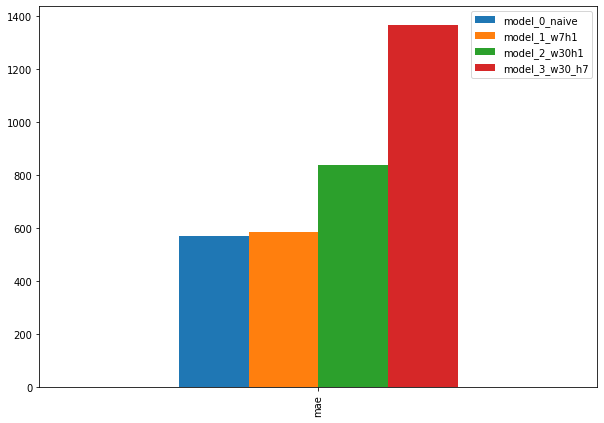

In [186]:
pd.DataFrame({'model_0_naive': model_0_scores['mae'],
              'model_1_w7h1': model_1_scores['mae'],
              'model_2_w30h1': model_2_scores['mae'],
              'model_3_w30_h7': model_3_scores['mae']},
             index=['mae']).plot(figsize=(10, 7), kind='bar')

### Model 4: Conv1D

In [187]:
windows, targets = windows_and_horizons(prices, horizon_size=1)
train_data, test_data, train_targets, test_targets = make_train_test_split(windows, targets, SPLIT_FACTOR)
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_targets)).batch(64).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_targets)).batch(64).prefetch(tf.data.AUTOTUNE)
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [188]:
inputs = layers.Input(shape=(7,), dtype=tf.float32)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.Conv1D(filters=128, kernel_size=53, padding='causal', activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Conv1D(filters=128, kernel_size=3, padding='causal', activation='relu')(x)
outputs = layers.Dense(1)(x)

model_4 = tf.keras.Model(inputs, outputs)

model_4.compile(loss='mae', optimizer='adam', metrics=['mae'])
model_4.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_2 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 128)            47616     
                                                                 
 dropout_1 (Dropout)         (None, 1, 128)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 128)            49280     
                                                                 
 dense_14 (Dense)            (None, 1, 1)              129       
                                                                 
Total params: 97,025
Trainable params: 97,025
Non-trainable

In [189]:
history_4 = model_4.fit(train_dataset, steps_per_epoch=len(train_dataset),
                        epochs=50, validation_data=test_dataset, 
                        validation_steps=len(test_dataset),
                        callbacks=[create_cp_callback('model_4')])

Epoch 1/50
35/35 [==============================] - 2s 42ms/step - loss: 438.2463 - mae: 438.2463 - val_loss: 1534.9834 - val_mae: 1534.9834
Epoch 2/50
35/35 [==============================] - 1s 25ms/step - loss: 351.6115 - mae: 351.6115 - val_loss: 1070.9951 - val_mae: 1070.9951
Epoch 3/50
35/35 [==============================] - 0s 4ms/step - loss: 328.9193 - mae: 328.9193 - val_loss: 1090.1165 - val_mae: 1090.1165
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 335.8277 - mae: 335.8277 - val_loss: 1104.4199 - val_mae: 1104.4199
Epoch 5/50
35/35 [==============================] - 1s 26ms/step - loss: 327.8123 - mae: 327.8123 - val_loss: 969.9328 - val_mae: 969.9328
Epoch 6/50
35/35 [==============================] - 1s 25ms/step - loss: 312.9465 - mae: 312.9465 - val_loss: 968.6765 - val_mae: 968.6765
Epoch 7/50
35/35 [==============================] - 1s 26ms/step - loss: 305.0696 - mae: 305.0696 - val_loss: 963.9215 - val_mae: 963.9215
Epoch 8/50
35/35 [===

In [190]:
model_4 = tf.keras.models.load_model('experiments/checkpoints/model_4')
model_4_preds = model_4.predict(test_dataset)

In [191]:
model_4_preds.shape, test_targets.shape, tf.squeeze(model_4_preds).shape, tf.squeeze(test_targets).shape

((556, 1, 1), (556, 1), TensorShape([556]), TensorShape([556]))

In [192]:
model_4_scores = forecasting_scores(tf.squeeze(test_targets), tf.squeeze(model_4_preds))
model_4_scores

{'mae': 769.5346,
 'mse': 1955743.2,
 'rmse': 1398.4789,
 'mape': 3.3936832,
 'mase': 1.3518592}

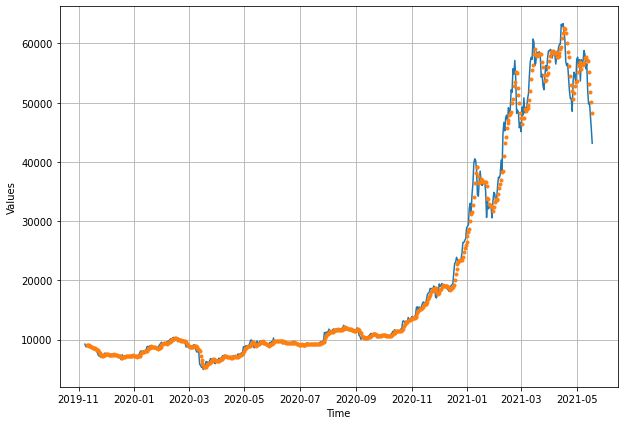

In [193]:
plt.figure(figsize=(10, 7))
plotting_function(dates_test, prices_test, format='-')
plotting_function(dates_test[-len(test_data):], tf.squeeze(model_4_preds))

### Model 5 (LSTM, w7h1)

In [194]:
inputs = layers.Input(shape=(7,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation="relu")(x)
output = layers.Dense(1)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

In [195]:
history_5 = model_5.fit(train_dataset,
            epochs=50,
            steps_per_epoch=len(train_dataset),
            validation_steps=len(test_dataset),
            validation_data=test_dataset,
            callbacks=[create_cp_callback('model_5_LSTM')])

Epoch 1/50
26/35 [=====================>........] - ETA: 0s - loss: 588.2914

35/35 [==============================] - 3s 55ms/step - loss: 577.9691 - val_loss: 1651.8411
Epoch 2/50
32/35 [==========================>...] - ETA: 0s - loss: 173.9875

35/35 [==============================] - 2s 49ms/step - loss: 216.8187 - val_loss: 1308.5562
Epoch 3/50
35/35 [==============================] - 0s 6ms/step - loss: 229.2351 - val_loss: 1389.1522
Epoch 4/50
33/35 [===========================>..] - ETA: 0s - loss: 181.4877

35/35 [==============================] - 2s 63ms/step - loss: 193.6643 - val_loss: 1161.8464
Epoch 5/50
31/35 [=========================>....] - ETA: 0s - loss: 155.9154

35/35 [==============================] - 2s 49ms/step - loss: 188.4182 - val_loss: 1113.3376
Epoch 6/50
32/35 [==========================>...] - ETA: 0s - loss: 160.4424

35/35 [==============================] - 2s 48ms/step - loss: 186.2123 - val_loss: 1022.0233
Epoch 7/50
35/35 [==============================] - 0s 6ms/step - loss: 190.4687 - val_loss: 1076.0739
Epoch 8/50
35/35 [==============================] - 0s 6ms/step - loss: 183.8327 - val_loss: 1036.9567
Epoch 9/50
32/35 [==========================>...] - ETA: 0s - loss: 157.2084

35/35 [==============================] - 2s 48ms/step - loss: 181.5026 - val_loss: 1015.5546
Epoch 10/50
33/35 [===========================>..] - ETA: 0s - loss: 168.7920

35/35 [==============================] - 2s 49ms/step - loss: 178.9937 - val_loss: 1009.1601
Epoch 11/50
32/35 [==========================>...] - ETA: 0s - loss: 153.3175

35/35 [==============================] - 2s 49ms/step - loss: 177.4258 - val_loss: 1000.5710
Epoch 12/50
33/35 [===========================>..] - ETA: 0s - loss: 165.8477

35/35 [==============================] - 2s 48ms/step - loss: 175.9511 - val_loss: 987.7888
Epoch 13/50
30/35 [========================>.....] - ETA: 0s - loss: 147.2762

35/35 [==============================] - 2s 49ms/step - loss: 173.9798 - val_loss: 985.5206
Epoch 14/50
31/35 [=========================>....] - ETA: 0s - loss: 144.5562

35/35 [==============================] - 2s 65ms/step - loss: 173.8264 - val_loss: 975.7589
Epoch 15/50
32/35 [==========================>...] - ETA: 0s - loss: 149.1501

35/35 [==============================] - 2s 49ms/step - loss: 172.3227 - val_loss: 948.4670
Epoch 16/50
33/35 [===========================>..] - ETA: 0s - loss: 159.4969

35/35 [==============================] - 2s 49ms/step - loss: 169.4269 - val_loss: 945.5362
Epoch 17/50
33/35 [===========================>..] - ETA: 0s - loss: 157.9994

35/35 [==============================] - 2s 48ms/step - loss: 167.8392 - val_loss: 937.3451
Epoch 18/50
34/35 [============================>.] - ETA: 0s - loss: 162.5181

35/35 [==============================] - 2s 48ms/step - loss: 166.5082 - val_loss: 925.8754
Epoch 19/50
34/35 [============================>.] - ETA: 0s - loss: 161.2130

35/35 [==============================] - 2s 48ms/step - loss: 165.1858 - val_loss: 916.8015
Epoch 20/50
34/35 [============================>.] - ETA: 0s - loss: 160.3275

35/35 [==============================] - 2s 48ms/step - loss: 164.1921 - val_loss: 907.5839
Epoch 21/50
33/35 [===========================>..] - ETA: 0s - loss: 153.1352

35/35 [==============================] - 2s 48ms/step - loss: 162.5517 - val_loss: 905.0555
Epoch 22/50
33/35 [===========================>..] - ETA: 0s - loss: 152.2982

35/35 [==============================] - 2s 48ms/step - loss: 161.5808 - val_loss: 895.5847
Epoch 23/50
32/35 [==========================>...] - ETA: 0s - loss: 139.0478

35/35 [==============================] - 2s 68ms/step - loss: 161.4288 - val_loss: 882.6086
Epoch 24/50
31/35 [=========================>....] - ETA: 0s - loss: 132.7906

35/35 [==============================] - 2s 48ms/step - loss: 158.8589 - val_loss: 871.7963
Epoch 25/50
30/35 [========================>.....] - ETA: 0s - loss: 133.9020

35/35 [==============================] - 2s 48ms/step - loss: 160.0020 - val_loss: 866.5179
Epoch 26/50
31/35 [=========================>....] - ETA: 0s - loss: 131.0552

35/35 [==============================] - 2s 49ms/step - loss: 156.8325 - val_loss: 853.1375
Epoch 27/50
34/35 [============================>.] - ETA: 0s - loss: 152.6379

35/35 [==============================] - 2s 48ms/step - loss: 156.3682 - val_loss: 852.8115
Epoch 28/50
33/35 [===========================>..] - ETA: 0s - loss: 145.5634

35/35 [==============================] - 2s 49ms/step - loss: 154.5221 - val_loss: 846.3729
Epoch 29/50
32/35 [==========================>...] - ETA: 0s - loss: 131.6151

35/35 [==============================] - 2s 51ms/step - loss: 153.0336 - val_loss: 834.4941
Epoch 30/50
33/35 [===========================>..] - ETA: 0s - loss: 142.2911

35/35 [==============================] - 2s 48ms/step - loss: 151.4341 - val_loss: 825.1838
Epoch 31/50
33/35 [===========================>..] - ETA: 0s - loss: 141.6673

35/35 [==============================] - 2s 49ms/step - loss: 150.6187 - val_loss: 821.1841
Epoch 32/50
31/35 [=========================>....] - ETA: 0s - loss: 124.7113

35/35 [==============================] - 2s 49ms/step - loss: 150.4276 - val_loss: 817.1849
Epoch 33/50
34/35 [============================>.] - ETA: 0s - loss: 145.5699

35/35 [==============================] - 2s 47ms/step - loss: 149.1811 - val_loss: 810.4230
Epoch 34/50
30/35 [========================>.....] - ETA: 0s - loss: 123.9766

35/35 [==============================] - 2s 73ms/step - loss: 148.7195 - val_loss: 800.7127
Epoch 35/50
30/35 [========================>.....] - ETA: 0s - loss: 122.5819

35/35 [==============================] - 2s 48ms/step - loss: 145.6455 - val_loss: 790.5442
Epoch 36/50
33/35 [===========================>..] - ETA: 0s - loss: 136.9187

35/35 [==============================] - 2s 48ms/step - loss: 145.7295 - val_loss: 781.7980
Epoch 37/50
35/35 [==============================] - 0s 6ms/step - loss: 145.4408 - val_loss: 785.4568
Epoch 38/50
30/35 [========================>.....] - ETA: 0s - loss: 120.2583

35/35 [==============================] - 2s 48ms/step - loss: 143.2667 - val_loss: 771.8057
Epoch 39/50
32/35 [==========================>...] - ETA: 0s - loss: 122.8320

35/35 [==============================] - 2s 48ms/step - loss: 143.2167 - val_loss: 765.8401
Epoch 40/50
34/35 [============================>.] - ETA: 0s - loss: 137.9738

35/35 [==============================] - 2s 48ms/step - loss: 141.7978 - val_loss: 761.7179
Epoch 41/50
34/35 [============================>.] - ETA: 0s - loss: 137.7294

35/35 [==============================] - 2s 48ms/step - loss: 141.5204 - val_loss: 756.4749
Epoch 42/50
32/35 [==========================>...] - ETA: 0s - loss: 120.2451

35/35 [==============================] - 2s 48ms/step - loss: 140.3122 - val_loss: 751.4440
Epoch 43/50
31/35 [=========================>....] - ETA: 0s - loss: 116.8627

35/35 [==============================] - 2s 49ms/step - loss: 140.5410 - val_loss: 746.8327
Epoch 44/50
31/35 [=========================>....] - ETA: 0s - loss: 115.5538

35/35 [==============================] - 2s 49ms/step - loss: 138.6311 - val_loss: 742.9137
Epoch 45/50
30/35 [========================>.....] - ETA: 0s - loss: 115.9524

35/35 [==============================] - 2s 48ms/step - loss: 138.2465 - val_loss: 737.2272
Epoch 46/50
30/35 [========================>.....] - ETA: 0s - loss: 115.3424

35/35 [==============================] - 2s 48ms/step - loss: 137.2792 - val_loss: 733.1186
Epoch 47/50
33/35 [===========================>..] - ETA: 0s - loss: 128.6090

35/35 [==============================] - 2s 49ms/step - loss: 137.0133 - val_loss: 728.4462
Epoch 48/50
31/35 [=========================>....] - ETA: 0s - loss: 113.4316

35/35 [==============================] - 3s 76ms/step - loss: 135.8643 - val_loss: 726.2245
Epoch 49/50
34/35 [============================>.] - ETA: 0s - loss: 132.8972

35/35 [==============================] - 2s 48ms/step - loss: 136.6240 - val_loss: 720.0202
Epoch 50/50
30/35 [========================>.....] - ETA: 0s - loss: 113.6211

35/35 [==============================] - 2s 48ms/step - loss: 134.9673 - val_loss: 717.6164


In [196]:
model_5 = tf.keras.models.load_model('experiments/checkpoints/model_5_LSTM')
model_5_preds = model_5.predict(test_dataset)

In [197]:
model_5_scores = forecasting_scores(tf.squeeze(test_targets), tf.squeeze(model_5_preds))
model_5_scores

{'mae': 717.6164,
 'mse': 1717659.1,
 'rmse': 1310.595,
 'mape': 3.1985755,
 'mase': 1.2606533}

###Model 6 (bidirectional LSTM, w7h1)

In [198]:
inputs = layers.Input(shape=(7,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.Bidirectional(layers.LSTM(128, activation="relu"))(x)
output = layers.Dense(1)(x)
model_6 = tf.keras.Model(inputs=inputs, outputs=output, name="model_6_bilstm")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

In [199]:
history_6 = model_6.fit(train_dataset,
            epochs=50,
            steps_per_epoch=len(train_dataset),
            validation_steps=len(test_dataset),
            validation_data=test_dataset,
            callbacks=[create_cp_callback('model_6_biLSTM')])

Epoch 1/50
28/35 [=======================>......] - ETA: 0s - loss: 381.7260

35/35 [==============================] - 6s 126ms/step - loss: 390.4672 - val_loss: 1332.6633
Epoch 2/50
35/35 [==============================] - ETA: 0s - loss: 199.4367

35/35 [==============================] - 4s 117ms/step - loss: 199.4367 - val_loss: 1025.9622
Epoch 3/50
30/35 [========================>.....] - ETA: 0s - loss: 167.5655

35/35 [==============================] - 4s 115ms/step - loss: 196.8565 - val_loss: 998.9579
Epoch 4/50
29/35 [=======================>......] - ETA: 0s - loss: 152.8894

35/35 [==============================] - 5s 136ms/step - loss: 183.7883 - val_loss: 982.0450
Epoch 5/50
32/35 [==========================>...] - ETA: 0s - loss: 157.6719

35/35 [==============================] - 5s 151ms/step - loss: 179.5478 - val_loss: 936.4654
Epoch 6/50
35/35 [==============================] - 0s 8ms/step - loss: 200.1495 - val_loss: 951.7219
Epoch 7/50
29/35 [=======================>......] - ETA: 0s - loss: 149.7986

35/35 [==============================] - 4s 117ms/step - loss: 180.3812 - val_loss: 933.1620
Epoch 8/50
28/35 [=======================>......] - ETA: 0s - loss: 147.3499

35/35 [==============================] - 4s 117ms/step - loss: 181.0222 - val_loss: 914.0192
Epoch 9/50
32/35 [==========================>...] - ETA: 0s - loss: 161.1322

35/35 [==============================] - 4s 117ms/step - loss: 183.9866 - val_loss: 899.1523
Epoch 10/50
29/35 [=======================>......] - ETA: 0s - loss: 141.6382

35/35 [==============================] - 4s 118ms/step - loss: 171.8094 - val_loss: 886.3804
Epoch 11/50
31/35 [=========================>....] - ETA: 0s - loss: 138.3755

35/35 [==============================] - 4s 116ms/step - loss: 165.2926 - val_loss: 876.8792
Epoch 12/50
29/35 [=======================>......] - ETA: 0s - loss: 137.8537

35/35 [==============================] - 4s 116ms/step - loss: 167.0347 - val_loss: 855.7632
Epoch 13/50
30/35 [========================>.....] - ETA: 0s - loss: 135.7951

35/35 [==============================] - 4s 116ms/step - loss: 160.6658 - val_loss: 849.7767
Epoch 14/50
30/35 [========================>.....] - ETA: 0s - loss: 135.3034

35/35 [==============================] - 6s 167ms/step - loss: 160.5497 - val_loss: 829.3832
Epoch 15/50
30/35 [========================>.....] - ETA: 0s - loss: 131.7616

35/35 [==============================] - 4s 119ms/step - loss: 156.6464 - val_loss: 821.3007
Epoch 16/50
29/35 [=======================>......] - ETA: 0s - loss: 128.3993

35/35 [==============================] - 4s 116ms/step - loss: 156.1868 - val_loss: 805.4785
Epoch 17/50
29/35 [=======================>......] - ETA: 0s - loss: 125.0667

35/35 [==============================] - 4s 117ms/step - loss: 153.0668 - val_loss: 789.7049
Epoch 18/50
35/35 [==============================] - ETA: 0s - loss: 151.1931

35/35 [==============================] - 4s 118ms/step - loss: 151.1931 - val_loss: 777.1033
Epoch 19/50
35/35 [==============================] - ETA: 0s - loss: 150.0262

35/35 [==============================] - 4s 118ms/step - loss: 150.0262 - val_loss: 766.3741
Epoch 20/50
30/35 [========================>.....] - ETA: 0s - loss: 123.9458

35/35 [==============================] - 4s 116ms/step - loss: 148.8292 - val_loss: 757.5742
Epoch 21/50
34/35 [============================>.] - ETA: 0s - loss: 142.4283

35/35 [==============================] - 4s 118ms/step - loss: 147.0970 - val_loss: 753.1373
Epoch 22/50
35/35 [==============================] - ETA: 0s - loss: 145.7674

35/35 [==============================] - 4s 116ms/step - loss: 145.7674 - val_loss: 744.2033
Epoch 23/50
35/35 [==============================] - ETA: 0s - loss: 143.1076

35/35 [==============================] - 6s 171ms/step - loss: 143.1076 - val_loss: 731.5950
Epoch 24/50
30/35 [========================>.....] - ETA: 0s - loss: 120.9526

35/35 [==============================] - 4s 118ms/step - loss: 144.5907 - val_loss: 727.4754
Epoch 25/50
29/35 [=======================>......] - ETA: 0s - loss: 114.6116

35/35 [==============================] - 4s 119ms/step - loss: 139.5671 - val_loss: 716.2504
Epoch 26/50
29/35 [=======================>......] - ETA: 0s - loss: 117.4457

35/35 [==============================] - 4s 117ms/step - loss: 142.5695 - val_loss: 712.7578
Epoch 27/50
30/35 [========================>.....] - ETA: 0s - loss: 114.7229

35/35 [==============================] - 4s 118ms/step - loss: 137.0761 - val_loss: 703.3519
Epoch 28/50
29/35 [=======================>......] - ETA: 0s - loss: 114.9194

35/35 [==============================] - 4s 119ms/step - loss: 138.9614 - val_loss: 696.9101
Epoch 29/50
30/35 [========================>.....] - ETA: 0s - loss: 114.1235

35/35 [==============================] - 4s 118ms/step - loss: 136.3467 - val_loss: 692.0845
Epoch 30/50
29/35 [=======================>......] - ETA: 0s - loss: 112.0428

35/35 [==============================] - 4s 116ms/step - loss: 136.1713 - val_loss: 686.8685
Epoch 31/50
29/35 [=======================>......] - ETA: 0s - loss: 111.7545

35/35 [==============================] - 4s 118ms/step - loss: 136.4286 - val_loss: 681.5608
Epoch 32/50
33/35 [===========================>..] - ETA: 0s - loss: 125.5164

35/35 [==============================] - 4s 119ms/step - loss: 134.6097 - val_loss: 677.1391
Epoch 33/50
35/35 [==============================] - ETA: 0s - loss: 135.0101

35/35 [==============================] - 4s 118ms/step - loss: 135.0101 - val_loss: 673.2460
Epoch 34/50
34/35 [============================>.] - ETA: 0s - loss: 130.0168

35/35 [==============================] - 7s 196ms/step - loss: 133.9209 - val_loss: 669.1467
Epoch 35/50
33/35 [===========================>..] - ETA: 0s - loss: 125.6689

35/35 [==============================] - 5s 133ms/step - loss: 134.0736 - val_loss: 665.2869
Epoch 36/50
35/35 [==============================] - ETA: 0s - loss: 133.0800

35/35 [==============================] - 4s 119ms/step - loss: 133.0800 - val_loss: 661.4923
Epoch 37/50
29/35 [=======================>......] - ETA: 0s - loss: 108.6052

35/35 [==============================] - 4s 117ms/step - loss: 132.4838 - val_loss: 658.2896
Epoch 38/50
29/35 [=======================>......] - ETA: 0s - loss: 109.4638

35/35 [==============================] - 4s 117ms/step - loss: 133.2027 - val_loss: 655.0441
Epoch 39/50
34/35 [============================>.] - ETA: 0s - loss: 127.7736

35/35 [==============================] - 4s 118ms/step - loss: 131.7935 - val_loss: 652.6411
Epoch 40/50
31/35 [=========================>....] - ETA: 0s - loss: 111.0762

35/35 [==============================] - 4s 117ms/step - loss: 132.9438 - val_loss: 651.1028
Epoch 41/50
29/35 [=======================>......] - ETA: 0s - loss: 107.2319

35/35 [==============================] - 4s 118ms/step - loss: 131.1561 - val_loss: 650.2709
Epoch 42/50
34/35 [============================>.] - ETA: 0s - loss: 127.5826

35/35 [==============================] - 4s 123ms/step - loss: 131.3660 - val_loss: 643.5578
Epoch 43/50
29/35 [=======================>......] - ETA: 0s - loss: 105.2598

35/35 [==============================] - 4s 117ms/step - loss: 127.9846 - val_loss: 639.9734
Epoch 44/50
35/35 [==============================] - 0s 8ms/step - loss: 135.2030 - val_loss: 643.9462
Epoch 45/50
30/35 [========================>.....] - ETA: 0s - loss: 106.9703

35/35 [==============================] - 4s 118ms/step - loss: 128.7374 - val_loss: 638.9904
Epoch 46/50
35/35 [==============================] - 0s 8ms/step - loss: 133.0548 - val_loss: 644.4374
Epoch 47/50
29/35 [=======================>......] - ETA: 0s - loss: 103.6739

35/35 [==============================] - 4s 118ms/step - loss: 126.3223 - val_loss: 630.5362
Epoch 48/50
35/35 [==============================] - 0s 9ms/step - loss: 132.8760 - val_loss: 630.8691
Epoch 49/50
35/35 [==============================] - ETA: 0s - loss: 126.6411

35/35 [==============================] - 4s 116ms/step - loss: 126.6411 - val_loss: 627.1970
Epoch 50/50
35/35 [==============================] - 0s 9ms/step - loss: 131.5126 - val_loss: 628.3370


In [200]:
model_6 = tf.keras.models.load_model('experiments/checkpoints/model_6_biLSTM')
model_6_preds = model_6.predict(test_dataset)
model_6_scores = forecasting_scores(tf.squeeze(test_targets), tf.squeeze(model_6_preds))
model_6_scores

{'mae': 627.19696,
 'mse': 1381324.2,
 'rmse': 1175.2975,
 'mape': 2.8432446,
 'mase': 1.1018113}

## Adding data with block rewards

In [201]:
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

In [202]:
block_reward_2_datetime = np.datetime64('2012-11-28')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-18')
block_reward_4_datetime.dtype

dtype('<M8[D]')

In [203]:
block_reward_2_index = np.where(dates == block_reward_2_datetime)
block_reward_3_index = np.where(dates == block_reward_3_datetime)
block_reward_4_index = np.where(dates == block_reward_4_datetime)

block_reward_3_index[0][0]

1012

In [204]:
i = block_reward_4_index[0][0] - block_reward_3_index[0][0]
j = len(dates) - block_reward_4_index[0][0]

In [205]:
reward_df = pd.DataFrame({'block_reward': [25] * block_reward_3_index[0][0]
                          + [12.5] * i + [6.125] * j}, index=dates)

In [206]:
len(reward_df), len(dates), reward_df.iloc[:10]

(2787, 2787,             block_reward
 2013-10-01          25.0
 2013-10-02          25.0
 2013-10-03          25.0
 2013-10-04          25.0
 2013-10-05          25.0
 2013-10-06          25.0
 2013-10-07          25.0
 2013-10-08          25.0
 2013-10-09          25.0
 2013-10-10          25.0)

In [207]:
bitcoin_prices['block_reward'] = reward_df['block_reward']

In [208]:
bitcoin_prices

,Price,block_reward
Date,,
2013-10-01,123.654990,25.000
2013-10-02,125.455000,25.000
2013-10-03,108.584830,25.000
2013-10-04,118.674660,25.000
2013-10-05,121.338660,25.000
...,...,...
2021-05-14,49764.132082,6.125
2021-05-15,50032.693137,6.125
2021-05-16,47885.625255,6.125


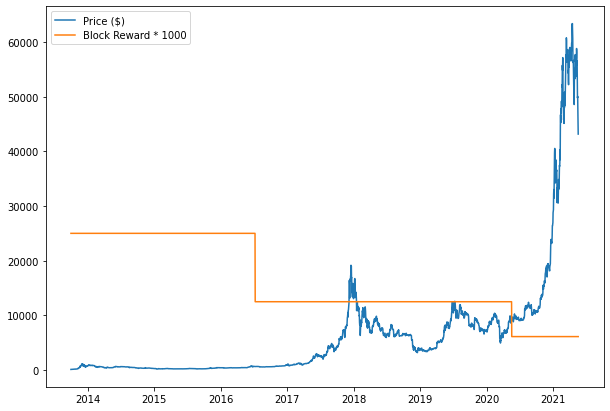

In [209]:
plt.figure(figsize=(10, 7))
plt.plot(bitcoin_prices['Price'], label='Price ($)')
plt.plot(bitcoin_prices['block_reward'] * 1000, label='Block Reward * 1000')
plt.legend();

In [210]:
bitcoin_prices_windowed = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f'Price+{-i-1}'] = bitcoin_prices_windowed['Price'].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+-1,Price+-2,Price+-3,Price+-4,Price+-5,Price+-6,Price+-7
Date,,,,,,,,,
2013-10-01,123.65499,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25.0,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25.0,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25.0,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25.0,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25.0,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25.0,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25.0,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25.0,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [211]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)
X.head()

,block_reward,Price+-1,Price+-2,Price+-3,Price+-4,Price+-5,Price+-6,Price+-7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [212]:
X_train, X_test = X.iloc[:int(SPLIT_FACTOR * len(X))], X.iloc[int(SPLIT_FACTOR * len(X)):]
y_train, y_test = y.iloc[:int(SPLIT_FACTOR * len(X))], y.iloc[int(SPLIT_FACTOR * len(X)):]


Important! Bear in minds that elements in windows are in reversed order compared to those created
with windows_and_horizons_function. Thus, we cannot append those values so easily if we wanted to

In [213]:
X_pandas = bitcoin_prices_windowed.dropna().drop(["Price", 'block_reward'], axis=1).astype(np.float32).to_numpy()
X_windows_and_horizons, _ = windows_and_horizons(prices)
X_pandas[0], X_windows_and_horizons[0]

(array([121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
        123.65499], dtype=float32),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ]))

### Model 7 (Multivariate data, w7h1)

In [214]:
model_7 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

model_7.compile(loss='mae', optimizer='Adam', metrics=['mae'])

In [215]:
model_7.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64,
            callbacks=[create_cp_callback('model_7_multi')])

Epoch 1/50
35/35 [==============================] - 1s 16ms/step - loss: 976.3984 - mae: 976.3984 - val_loss: 1909.7509 - val_mae: 1909.7509
Epoch 2/50
35/35 [==============================] - 0s 14ms/step - loss: 195.8145 - mae: 195.8145 - val_loss: 1023.1569 - val_mae: 1023.1569
Epoch 3/50
35/35 [==============================] - 3s 95ms/step - loss: 163.4228 - mae: 163.4228 - val_loss: 879.5112 - val_mae: 879.5112
Epoch 4/50
35/35 [==============================] - 0s 13ms/step - loss: 156.3822 - mae: 156.3822 - val_loss: 838.1153 - val_mae: 838.1152
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 151.7935 - mae: 151.7935 - val_loss: 870.5666 - val_mae: 870.5666
Epoch 6/50
35/35 [==============================] - 0s 14ms/step - loss: 144.8573 - mae: 144.8573 - val_loss: 758.1517 - val_mae: 758.1517
Epoch 7/50
35/35 [==============================] - 0s 14ms/step - loss: 132.5585 - mae: 132.5585 - val_loss: 703.0432 - val_mae: 703.0432
Epoch 8/50
35/35 [======

In [216]:
model_7 = tf.keras.models.load_model('/content/experiments/checkpoints/model_7_multi')
model_7_preds = model_7.predict(X_test)

In [217]:
model_7_scores = forecasting_scores(y_test, tf.squeeze(model_7_preds))
model_7_scores

{'mae': 568.93176,
 'mse': 1169613.2,
 'rmse': 1081.4866,
 'mape': 2.5451186,
 'mase': 0.9994555}

In [218]:
model_0_scores

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

### Model_8 (hybrid)

In [219]:
X_train.head()

,block_reward,Price+-1,Price+-2,Price+-3,Price+-4,Price+-5,Price+-6,Price+-7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [220]:
block_reward_train = X_train['block_reward'].to_numpy().astype(np.float32)
block_reward_test = X_test['block_reward'].to_numpy().astype(np.float32)
train_pric = X_train.drop('block_reward', axis=1).to_numpy().astype(np.float32)
test_pric = X_test.drop('block_reward', axis=1).to_numpy().astype(np.float32)
block_reward_train.shape, train_pric.shape

((2224,), (2224, 7))

In [221]:
train_dataset = tf.data.Dataset.from_tensor_slices(((train_pric, block_reward_train), y_train.to_numpy().astype(np.float32))).batch(64).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices(((test_pric, block_reward_test), y_test.to_numpy().astype(np.float32))).batch(64).prefetch(tf.data.AUTOTUNE)

In [222]:
price_inputs = layers.Input(shape=(7,), name='price_input_layer')
price_dense = layers.Dense(128, activation='relu')(price_inputs)
price_model = tf.keras.Model(price_inputs, price_dense)

block_inputs = layers.Input(shape=(1,), name='block_reward_input_layer')
block_dense = layers.Dense(128, activation='relu')(block_inputs)
block_model = tf.keras.Model(block_inputs, block_dense)

concat_inputs = layers.Concatenate()([price_model.output, block_model.output])
concat_dropout = layers.Dropout(0.1)(concat_inputs)
concat_dense = layers.Dense(32, activation='relu')(concat_dropout)
concat_outputs = layers.Dense(1)(concat_dense)

model_8 = tf.keras.Model([price_model.input, block_model.input], concat_outputs)

model_8.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])

model_8.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 price_input_layer (InputLayer)  [(None, 7)]         0           []                               
                                                                                                  
 block_reward_input_layer (Inpu  [(None, 1)]         0           []                               
 tLayer)                                                                                          
                                                                                                  
 dense_19 (Dense)               (None, 128)          1024        ['price_input_layer[0][0]']      
                                                                                                  
 dense_20 (Dense)               (None, 128)          256         ['block_reward_input_layer[

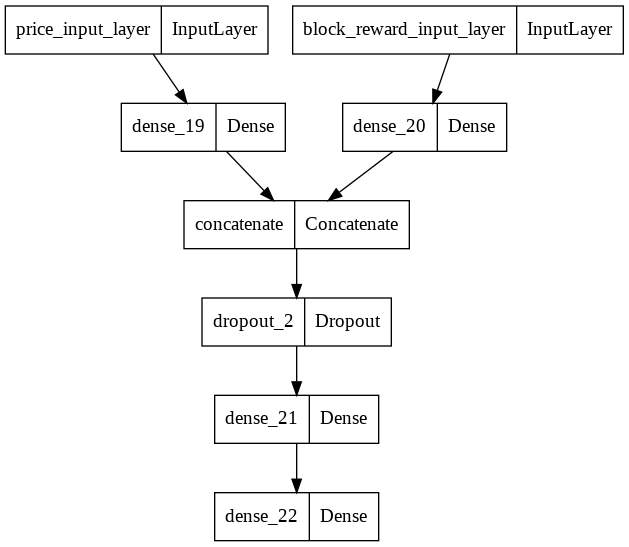

In [223]:
from tensorflow.keras.utils import plot_model

plot_model(model_8)

In [224]:
model_8.fit(train_dataset, epochs=50, steps_per_epoch=len(train_dataset), validation_data=test_dataset, validation_steps=len(test_dataset),
            callbacks=[create_cp_callback('model_8(hybrid)')])

Epoch 1/50
35/35 [==============================] - 1s 26ms/step - loss: 345.9918 - mae: 345.9918 - val_loss: 1224.1051 - val_mae: 1224.1051
Epoch 2/50
35/35 [==============================] - 1s 24ms/step - loss: 260.8639 - mae: 260.8639 - val_loss: 901.5554 - val_mae: 901.5554
Epoch 3/50
35/35 [==============================] - 1s 24ms/step - loss: 234.7111 - mae: 234.7111 - val_loss: 881.2642 - val_mae: 881.2642
Epoch 4/50
35/35 [==============================] - 1s 23ms/step - loss: 215.8706 - mae: 215.8706 - val_loss: 814.4114 - val_mae: 814.4114
Epoch 5/50
35/35 [==============================] - 0s 4ms/step - loss: 218.0612 - mae: 218.0612 - val_loss: 1007.5267 - val_mae: 1007.5267
Epoch 6/50
35/35 [==============================] - 0s 4ms/step - loss: 212.2353 - mae: 212.2353 - val_loss: 870.9376 - val_mae: 870.9376
Epoch 7/50
35/35 [==============================] - 0s 3ms/step - loss: 207.8438 - mae: 207.8438 - val_loss: 959.0883 - val_mae: 959.0883
Epoch 8/50
35/35 [========

In [225]:
model_8 = tf.keras.models.load_model('/content/experiments/checkpoints/model_8(hybrid)')
model_8_preds = model_8.predict(test_dataset)
model_8_scores = forecasting_scores(y_test, tf.squeeze(model_8_preds))
model_8_scores

{'mae': 647.9719,
 'mse': 1447622.6,
 'rmse': 1203.1719,
 'mape': 2.9423392,
 'mase': 1.1383072}

### Model 9 (N-BEATS)

In [226]:
# Create NBeatBlock layer

class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of fully connected layers
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
    # Output of block is a theta layers
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name='theta')

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcas and forecas
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [227]:
dummy_nbeats_block_layer = NBeatsBlock(7,
                                       7+1, #window + horizon#
                                       1,
                                       128,
                                       4)

In [228]:
dummy_window = tf.expand_dims(tf.range(7) + 1, axis=0)
dummy_window

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [229]:
backcast, forecast = dummy_nbeats_block_layer(dummy_window)
backcast, forecast

(<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
 array([[-0.70122755, -0.2781932 ,  0.03710113,  0.82664037, -0.2654006 ,
         -0.18066387,  0.27910915]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.03784774]], dtype=float32)>)

In [230]:
windows, targets = windows_and_horizons(prices, horizon_size=1)
train_data, test_data, train_targets, test_targets = make_train_test_split(windows, targets, SPLIT_FACTOR)
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_targets)).batch(64).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_targets)).batch(64).prefetch(tf.data.AUTOTUNE)
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

### Hyperparameters for N-BEATS
https://arxiv.org/pdf/1905.10437.pdf

In [231]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
INPUT_SIZE = 7
HORIZON = 1
THETA = 8
N_STACKS = 30

In [232]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

subtracted = layers.subtract([tensor_1, tensor_2])
added = layers.add([tensor_1, tensor_2])

print(f'Input tensors: {tensor_1.numpy()}, {tensor_2.numpy()}')
print(f'Subtracted: {subtracted}\nAdded: {added}')

Input tensors: [10 11 12 13 14 15 16 17 18 19], [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [233]:
tf.random.set_seed(667)
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA,
                                 horizon=HORIZON,
                                 n_layers=N_LAYERS,
                                 n_neurons=N_NEURONS,
                                 name='InititalBlock')


stack_input = layers.Input(shape=(INPUT_SIZE), name='stack_input')
residuals, forecast = nbeats_block_layer(stack_input)
for i, _ in enumerate(range(N_STACKS-1)):
  backcast, block_forecast = nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA,
                                 horizon=HORIZON,
                                 n_layers=N_LAYERS,
                                 n_neurons=N_NEURONS,
                                 name=f'Block{i}')(residuals)
  residuals = layers.subtract([residuals, backcast])
  forecast = layers.add([forecast, block_forecast])

model_9 = tf.keras.Model(stack_input, forecast)

model_9.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer=tf.keras.optimizers.Adam())
model_9.fit(train_dataset, epochs=N_EPOCHS, validation_data=test_dataset,
            verbose=1, callbacks=[tf.keras.callbacks.ReduceLROnPlateau(patience=100),
                       tf.keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True)])

Epoch 1/5000
35/35 [==============================] - 9s 72ms/step - loss: 620.2118 - val_loss: 1187.0035 - lr: 0.0010
Epoch 2/5000
35/35 [==============================] - 1s 26ms/step - loss: 355.1260 - val_loss: 2787.6548 - lr: 0.0010
Epoch 3/5000
35/35 [==============================] - 1s 27ms/step - loss: 465.3762 - val_loss: 4044.1619 - lr: 0.0010
Epoch 4/5000
35/35 [==============================] - 1s 30ms/step - loss: 464.7990 - val_loss: 786.7227 - lr: 0.0010
Epoch 5/5000
35/35 [==============================] - 1s 26ms/step - loss: 224.1923 - val_loss: 1384.2275 - lr: 0.0010
Epoch 6/5000
35/35 [==============================] - 1s 26ms/step - loss: 190.7024 - val_loss: 1624.3789 - lr: 0.0010
Epoch 7/5000
35/35 [==============================] - 1s 25ms/step - loss: 194.6727 - val_loss: 1017.4854 - lr: 0.0010
Epoch 8/5000
35/35 [==============================] - 1s 26ms/step - loss: 159.7721 - val_loss: 1755.1558 - lr: 0.0010
Epoch 9/5000
35/35 [=============================

In [234]:
model_9_preds = model_9.predict(test_data)

model_9_scores = forecasting_scores(tf.squeeze(test_targets), tf.squeeze(model_9_preds))

model_9_scores

{'mae': 575.0144,
 'mse': 1205248.5,
 'rmse': 1097.8381,
 'mape': 2.6282885,
 'mase': 1.010141}

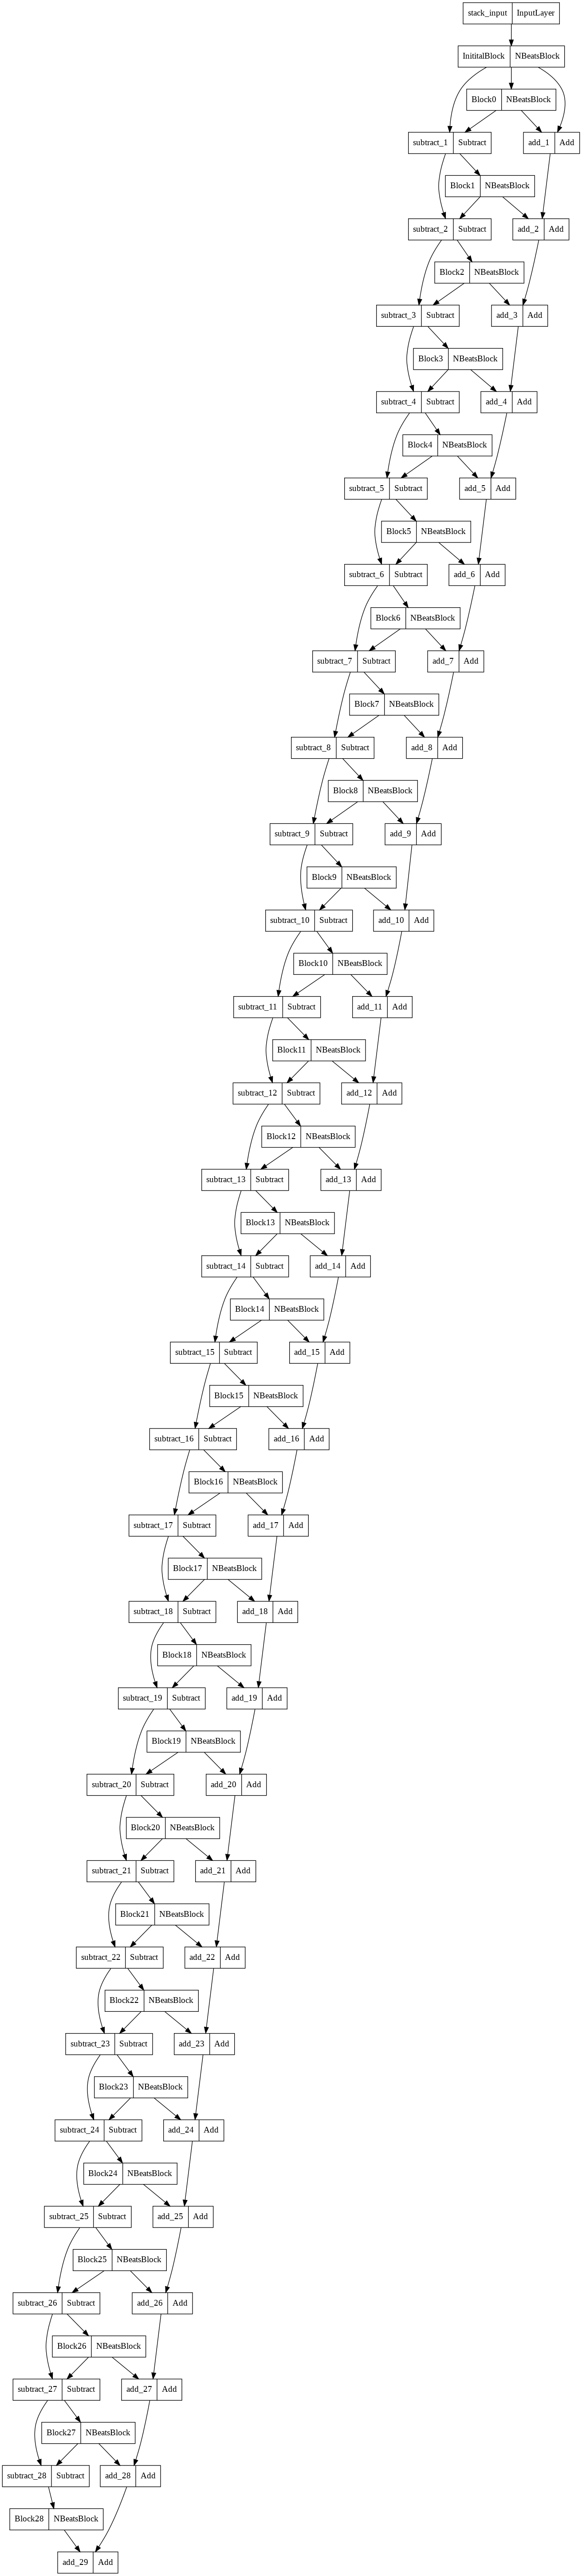

In [235]:
plot_model(model_9)

### Model 10 (ensemble)

In [236]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=['mae', 'mse', 'mape']):
  """ 
  Returns a list of num_iter models each trained on MAE, MSE, and MAPE loss.
  """

  ensemble_models = []
  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f'Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}')

      model = tf.keras.Sequential([
          layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
          layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
          layers.Dense(HORIZON)
      ])
      model.compile(loss=loss_function, optimizer='Adam', metrics=['mae', 'mse'])
      model.fit(train_data, epochs=num_epochs, validation_data=test_data, verbose=0,
                callbacks=[tf.keras.callbacks.EarlyStopping(patience=100, restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(patience=50, verbose=1)])
      ensemble_models.append(model)
  return ensemble_models

In [237]:
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 118: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 201: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 251: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 183: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 327: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 381: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 463: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 513: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 70: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 120: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.


In [238]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [239]:
ensemble_preds = make_ensemble_preds(ensemble_models, test_dataset)

In [240]:
ensemble_preds[:, :10]

<tf.Tensor: shape=(15, 10), dtype=float32, numpy=
array([[8785.507 , 8756.31  , 9058.104 , 8738.105 , 8756.137 , 8738.379 ,
        8637.02  , 8526.602 , 8445.611 , 8531.045 ],
       [8728.875 , 8748.154 , 9054.018 , 8689.431 , 8735.485 , 8716.445 ,
        8591.856 , 8516.393 , 8403.705 , 8514.576 ],
       [8813.264 , 8827.381 , 9050.902 , 8723.608 , 8838.705 , 8700.258 ,
        8663.752 , 8516.794 , 8459.42  , 8546.398 ],
       [8759.461 , 8761.738 , 9088.845 , 8670.832 , 8711.177 , 8759.429 ,
        8625.359 , 8537.601 , 8398.286 , 8551.806 ],
       [8746.743 , 8698.057 , 9078.029 , 8787.683 , 8654.11  , 8746.734 ,
        8614.26  , 8522.497 , 8395.514 , 8523.844 ],
       [8741.083 , 8786.624 , 9101.284 , 8708.556 , 8741.251 , 8733.119 ,
        8646.505 , 8505.892 , 8442.18  , 8554.199 ],
       [8801.088 , 8736.354 , 9036.683 , 8749.877 , 8716.762 , 8761.977 ,
        8625.2705, 8504.788 , 8441.284 , 8509.644 ],
       [8871.83  , 8766.03  , 9019.081 , 8799.293 , 8806.395 

In [241]:
ensemble_results = forecasting_scores(y_test, ensemble_preds)
ensemble_results

{'mae': 573.56055,
 'mse': 1163683.2,
 'rmse': 1078.7415,
 'mape': 2.5801632,
 'mase': 1.0075871}

In [242]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8777.89 , 8753.97 , 9056.879, 8738.584, 8741.677, 8724.785,
       8645.225, 8511.911, 8433.075, 8529.366], dtype=float32)>

In [243]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8775.472, 8759.926, 9062.198, 8743.165, 8741.251, 8733.119,
       8646.505, 8516.393, 8435.737, 8531.045], dtype=float32)

In [244]:
ensemble_score_mean = forecasting_scores(y_test, ensemble_mean)
ensemble_score_mean

{'mae': 563.83154,
 'mse': 1134575.2,
 'rmse': 1065.1644,
 'mape': 2.528307,
 'mase': 0.99049586}

In [245]:
ensemble_score_median = forecasting_scores(y_test, ensemble_median)
ensemble_score_median

{'mae': 566.1808,
 'mse': 1138810.9,
 'rmse': 1067.1508,
 'mape': 2.530361,
 'mase': 0.9946228}

In [246]:
model_10_scores = ensemble_score_mean

In [247]:
model_0_scores

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

### 95% confidence prediction intervals

In [248]:
def get_lower_upper(preds): # Take the predictions from a number of randomly initialized models
  std = tf.math.reduce_std(preds, axis=0)
  interval = 1.96 * std
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

In [249]:
lower, upper = get_lower_upper(ensemble_preds)

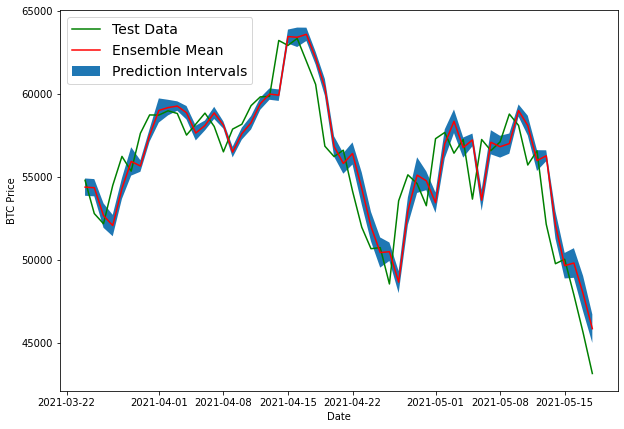

In [250]:
offset = 500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], 'g', label='Test Data')
plt.plot(X_test.index[offset:], ensemble_mean[offset:], 'r-', label='Ensemble Mean')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.fill_between(X_test.index[offset:], (lower)[offset:], (upper)[offset:], label='Prediction Intervals')
plt.legend(loc='upper left', fontsize=14);

### Model 11 (full historical data and making prediction into the future)

In [251]:
X_all = bitcoin_prices_windowed.dropna().drop(['Price', 'block_reward'], axis=1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()['Price'].to_numpy()

In [252]:
full_dataset = tf.data.Dataset.from_tensor_slices((X_all, y_all)).batch(128).prefetch(tf.data.AUTOTUNE)

In [253]:
model_11 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

model_11.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                 optimizer=tf.keras.optimizers.Adam())

model_11.fit(full_dataset, epochs=300, verbose=0, callbacks=[tf.keras.callbacks.EarlyStopping(
    monitor='loss', patience=100, restore_best_weights=True), tf.keras.callbacks.ReduceLROnPlateau(
        patience=30, monitor='loss'
    )])

In [254]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [255]:
future_forecast = make_future_forecast(y_all, model_11, 14, 7)

Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55247.1015625

Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55247.1015625 ] -> Prediction: 52612.8515625

Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55247.1015625  52612.8515625 ] -> Prediction: 50253.3359375

Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55247.1015625  52612.8515625  50253.3359375 ] -> Prediction: 46890.5703125

Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55247.1015625
 52612.8515625  50253.3359375  46890.5703125 ] -> Prediction: 46400.68359375

Predicting on: 
 [45604.61575361 43144.47129086 55247.1015625  52612.8515625
 50253.3359375  46890.5703125  46400.68359375] -> Prediction: 45170.06640625

Predicting on: 
 [43144.47129086 55247.1015625  52612.8515625  50253.3

In [256]:
len(future_forecast)

14

In [257]:
bitcoin_prices.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.125
2021-05-15,50032.693137,6.125
2021-05-16,47885.625255,6.125
2021-05-17,45604.615754,6.125
2021-05-18,43144.471291,6.125


In [258]:
def get_future_dates(start_date, into_future, offset=1):
  start_date = start_date + np.timedelta64(offset, 'D')
  end_date = start_date + np.timedelta64(into_future, 'D')
  return np.arange(start_date, end_date, dtype='datetime64[D]')

In [259]:
last_timestep = bitcoin_prices.index[-1]
next_timesteps = get_future_dates(start_date=last_timestep, into_future=14)

In [260]:
next_timesteps.shape, next_timesteps

((14,), array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
        '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
        '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
        '2021-05-31', '2021-06-01'], dtype='datetime64[D]'))

In [261]:
prices[-1]

43144.4712908603

In [262]:
next_timesteps = np.insert(next_timesteps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, prices[-1])

In [263]:
future_forecast.shape, next_timesteps.shape

((15,), (15,))

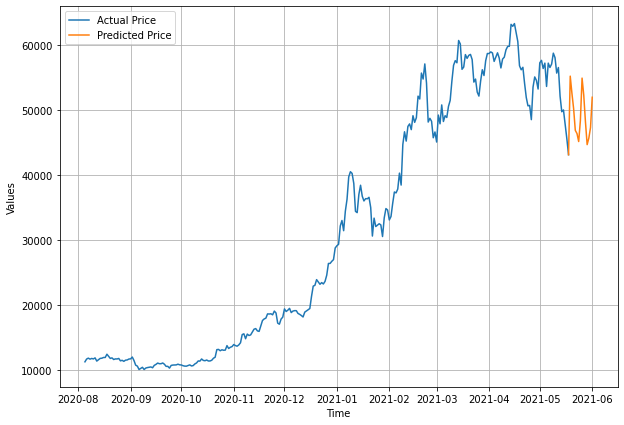

In [264]:
plt.figure(figsize=(10, 7))
plotting_function(bitcoin_prices.index, prices, start=2500, format='-', label='Actual Price')
plotting_function(next_timesteps, future_forecast, format='-', label='Predicted Price')

### Model 12 (turkey problem)

In [265]:
btc_price_turkey = bitcoin_prices.copy()
btc_price_turkey = btc_price_turkey['Price']
btc_price_turkey[-1] = btc_price_turkey[-1] / 10

In [266]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

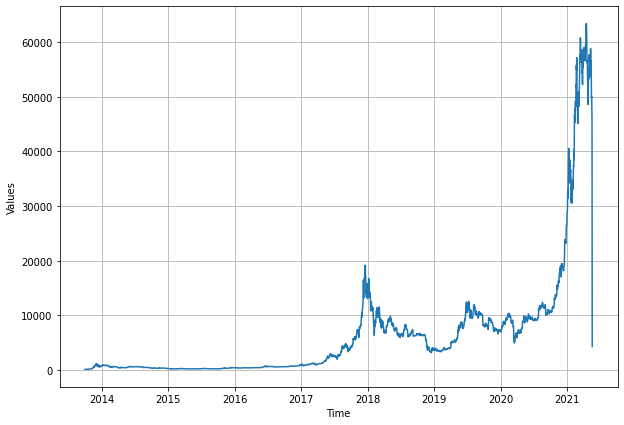

In [267]:
plt.figure(figsize=(10, 7))
plotting_function(btc_timesteps_turkey,
                  btc_price_turkey,
                  format='-')

In [268]:
full_windows, full_labels = windows_and_horizons(np.array(btc_price_turkey), window_size=WINDOW_SIZE)

X_train, X_test, y_train, y_test = make_train_test_split(full_windows, full_labels)

In [269]:
model_12 = tf.keras.models.clone_model(model_1)
model_12.compile(loss='mae', optimizer='adam')
model_12.fit(X_train, y_train, epochs=50, batch_size=64,
             validation_data=(X_test, y_test),
             callbacks=[create_cp_callback('TurkeyProblemModel')])

Epoch 1/50
35/35 [==============================] - 1s 16ms/step - loss: 1055.4956 - val_loss: 1795.8628
Epoch 2/50
35/35 [==============================] - 0s 13ms/step - loss: 219.5785 - val_loss: 1134.9640
Epoch 3/50
35/35 [==============================] - 0s 13ms/step - loss: 193.5165 - val_loss: 1095.6957
Epoch 4/50
35/35 [==============================] - 0s 13ms/step - loss: 177.0680 - val_loss: 1024.9855
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 170.3515 - val_loss: 1047.2188
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 166.3354 - val_loss: 1068.9930
Epoch 7/50
35/35 [==============================] - 0s 13ms/step - loss: 154.3131 - val_loss: 926.1189
Epoch 8/50
35/35 [==============================] - 0s 13ms/step - loss: 148.3708 - val_loss: 882.9032
Epoch 9/50
35/35 [==============================] - 0s 13ms/step - loss: 145.7856 - val_loss: 842.4073
Epoch 10/50
35/35 [==============================] - 0s 13ms/step - 

In [270]:
model_12 = tf.keras.models.load_model('/content/experiments/checkpoints/TurkeyProblemModel')
turkey_preds = model_12.predict(X_test)

In [271]:
turkey_scores = forecasting_scores(y_test, tf.squeeze(turkey_preds))
turkey_scores

{'mae': 17144.521,
 'mse': 615784960.0,
 'rmse': 2097.785,
 'mape': 114.11423,
 'mase': 26.821596}

In [272]:
model_1_scores

{'mae': 583.0194,
 'mse': 1202658.5,
 'rmse': 1096.6578,
 'mape': 2.6214695,
 'mase': 1.2234869}

In [273]:
model_results = pd.DataFrame({'naive_model': model_0_scores,
                              'model_1_dense(w7h1)': model_1_scores,
                              'model_2_dense(w30h1)': model_2_scores,
                              'model_3_dense(w30h7)': model_3_scores,
                              'model_4_conv1D': model_4_scores,
                              'model_5_LSTM': model_5_scores,
                              'model_6_biLSTM': model_6_scores,
                              'model_7_multivariate_dense': model_7_scores,
                              'model_8_multivariate_hybrid': model_8_scores,
                              'model_9_NBeats': model_9_scores,
                              'model_10_ensemble': model_10_scores}).T

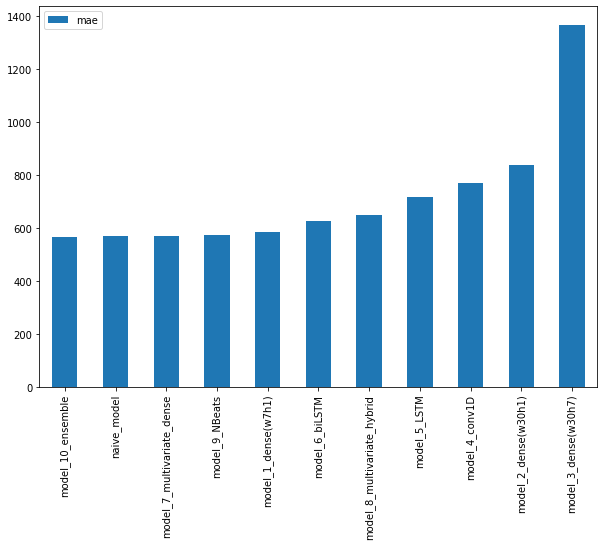

In [280]:
model_results[['mae']].sort_values(by='mae').plot(figsize=(10, 7), kind='bar');